In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn 

In [2]:
data = np.genfromtxt("../../data/data.dat")
data = np.genfromtxt("../../data/data.dat")
data = np.delete(data, 0, 0)
df = pd.DataFrame(data, columns = ['ustat','alph1','alph2', 'beta', 'chi'])
df.head()

,ustat,alph1,alph2,beta,chi
0,8.408213,2.344511,2.344511,60.0,1.094479
1,7.006844,2.344511,2.344511,60.0,0.840347
2,5.255133,2.344511,2.344511,60.0,0.772829
3,3.503422,2.344511,2.344511,60.0,0.811944
4,2.102053,2.344511,2.344511,60.0,0.844523


In [3]:
small_chi = np.genfromtxt("../../data/Small_chi.dat")
small_chi = np.delete(small_chi, 0, 0)
small_chi_df = pd.DataFrame(small_chi, columns = ['ustat','alph1','alph2', 'beta', 'chi'])

<AxesSubplot:xlabel='ustat', ylabel='chi'>

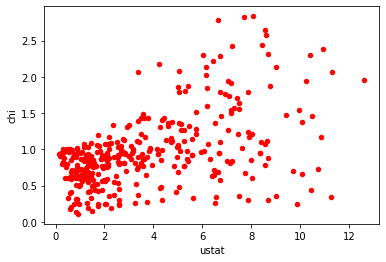

In [4]:
small_chi_df.plot.scatter(x='ustat', y='chi', c = "red")

In [5]:
# rightmost small_chi value
small_chi_df['ustat'].max()

12.597931067132

In [6]:
large_chi = np.genfromtxt("../../data/Large_chi.dat")
large_chi = np.delete(large_chi, 0, 0)
large_chi_df = pd.DataFrame(large_chi, columns = ['ustat','alph1','alph2', 'beta', 'chi'])

In [7]:
# leftmost large_chi value
large_chi_df['ustat'].min()

5.265923675845

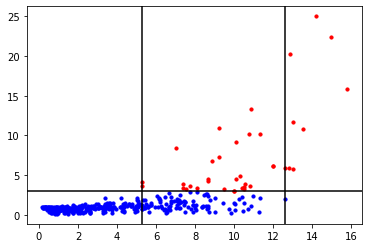

In [8]:
plt.scatter(small_chi_df['ustat'], small_chi_df['chi'], s = 10, c = 'blue')
plt.scatter(large_chi_df['ustat'], large_chi_df['chi'], s = 10, c = 'red')

plt.axhline(y=3, color='black', linestyle='-')
plt.axvline(x=5.27, color='black', linestyle='-')
plt.axvline(x=12.60, color='black', linestyle='-')

In [9]:
# diff = |alph1 - alph2|
diff = []

for i in range(len(df['alph1'])):
    diff.append(abs(df['alph1'][i] - df['alph2'][i]))
    
df['diff'] = diff

8.363363996971147
0.13114754098399972
0.0
92.894594594594


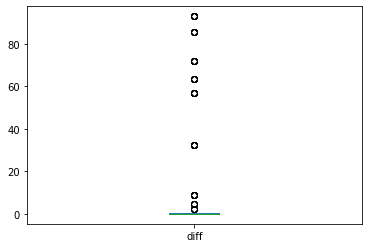

In [10]:
df['diff'].plot.box()
print(df['diff'].mean())
print(df['diff'].median())
print(df['diff'].min())
print(df['diff'].max())

0.25    0.000000
0.50    0.131148
0.75    0.366274
Name: diff, dtype: float64

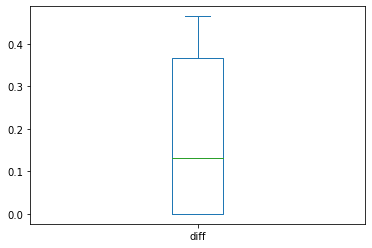

In [11]:
df['diff'].plot.box(showfliers=False)
df['diff'].quantile([0.25,0.5,0.75])

<AxesSubplot:xlabel='diff', ylabel='chi'>

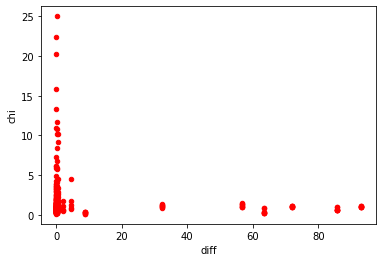

In [12]:
df.plot.scatter(x='diff', y='chi', c = "red")

In [13]:
# CHI

# small chi = 0
# large chi = 1
labels = []
for i in df['chi']:
    if i < 3:
        labels.append(0)
    else:
        labels.append(1)
        
df['chi'] = labels


In [14]:
df.head()

,ustat,alph1,alph2,beta,chi,diff
0,8.408213,2.344511,2.344511,60.0,0,0.0
1,7.006844,2.344511,2.344511,60.0,0,0.0
2,5.255133,2.344511,2.344511,60.0,0,0.0
3,3.503422,2.344511,2.344511,60.0,0,0.0
4,2.102053,2.344511,2.344511,60.0,0,0.0


In [15]:
# ALPH1

# small alph1 = 0
# medium alph1 = 1
# large alph1 = 2

labels = []
for i in df['alph1']:
    if i < 1:
        labels.append(0)
    elif i >= 1 and i < 2:
        labels.append(1)
    else:
        labels.append(2)
        
df['alph1'] = labels

In [16]:
# ALPH2

# small alph2 = 0
# large alph2 = 1

labels = []
for i in df['alph2']:
    if i < 2:
        labels.append(0)
    else:
        labels.append(1)
        
df['alph2'] = labels

In [17]:
# BETA

# small beta = 0
# large beta = 1
labels = []
for i in df['beta']:
    if i < 50:
        labels.append(0)
    else:
        labels.append(1)
        
df['beta'] = labels

In [18]:
# USTAT

# small ustat = 0
# large ustat = 1

labels = []
for i in df['ustat']:
    if i < 3:
        labels.append(0)
    else:
        labels.append(1)
        
df['ustat'] = labels

In [19]:
# BETA

# small beta = 0
# large beta = 1
labels = []
for i in df['beta']:
    if i < 50:
        labels.append(0)
    else:
        labels.append(1)
        
df['beta'] = labels

In [20]:
# DIFF

# small beta = 0
# large beta = 1
labels = []
for i in df['diff']:
    if i < 0.366274:
        labels.append(0)
    else:
        labels.append(1)
        
df['diff'] = labels

In [21]:
df.head()

,ustat,alph1,alph2,beta,chi,diff
0,1,2,1,0,0,0
1,1,2,1,0,0,0
2,1,2,1,0,0,0
3,1,2,1,0,0,0
4,0,2,1,0,0,0


In [22]:
df.to_csv("../../data/week03.csv", index = False)